In [6]:
import xarray as xr
import rasterio
import numpy as np 

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.cm import YlOrBr, Greys, Blues
import matplotlib.colors as colors

import sys
sys.path.append("../AWS_Scripts/")

import functions_model_analysis as f

#### PLOT COLOR SCHEMES

Basis:
- #FFFFCC (yellow)
- #FFEDA0 (light yellow)
- #FED976 (light orange)
- #FC8D59 (orange)
- #E34A33 (reddish orange)
- #B30000 (brownish red)
- #662506 (dark brown)
- #808080 (gray)
- #D3D3D3 (lightgray)

More:
- #FEE6CE (pale orange)
- #FDAE6B (bright orange)
- #FDBB84 (warm orange)
- #FC8D62 (coral)
- #EF6548 (reddish coral)
- #D7301F (dark coral)
- #8B0000 (dark red-brown)

light yellow / white: #ffffe5

orange: #fead3a

brown/red: #9c3605      or      firebrick

gray: #808080

lightgray: #D3D3D3

In [2]:
cmap = YlOrBr
cmap.set_bad('gray',1.)
cbar_kwargs={'label': "Snow Optical Grain Diameter (mm)"}
figsize=(6.4*1, 4.8*1)

## METHODS

### Raster Alignment Section - Example Microwave vs. Optical

In [9]:
opt_path = r"../Data/optical-rs/2019-07-03_grain_diameter.tif"
mw_path_tif = r"../Data/microwave-rs/mw-tif/2019-07-03_mw.tif"

data_mw_tif = xr.open_dataarray(mw_path_tif)
data_opt = xr.open_dataarray(opt_path)

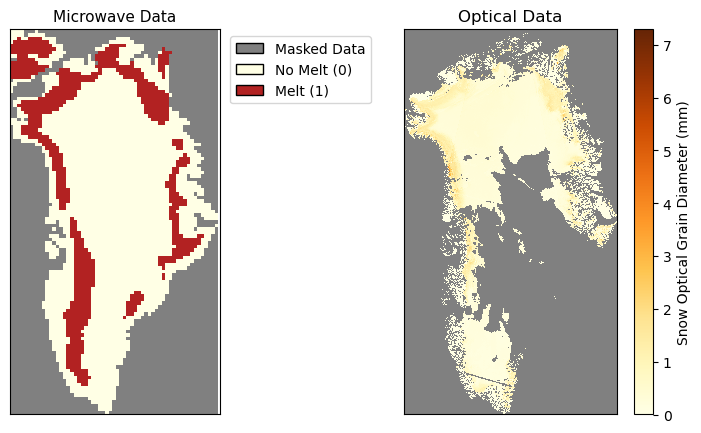

In [16]:
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,  figsize=(9.5,5))



# Plot the categorical data
colors_list = ["#808080", "#ffffe5", "firebrick"]  # Blue, Green, Red
# Create the colormap
my_cmap = colors.ListedColormap(colors_list)
cat_im = data_mw_tif.plot(ax=axs[0], cmap=my_cmap, add_colorbar=False)
axs[0].set_title('Microwave Data')
# set title font size
axs[0].title.set_size(11)

# Add legend to categorical data plot
legend_labels = ['Masked Data', 'No Melt (0)', 'Melt (1)']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors_list[i]) for i in range(3)]
# Iterate through the handles and call `set_edgecolor` on each
for ha in legend_handles:
    ha.set_edgecolor("black")

axs[0].legend(legend_handles, legend_labels, bbox_to_anchor=(1.75,1))


# Plot the continuous data
cont_im = data_opt.plot(ax=axs[1], cmap=cmap, cbar_kwargs=cbar_kwargs)
axs[1].set_title('Optical Data')



for idx, ax in enumerate(axs):
    ax.set_aspect("equal")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)


plt.show()

### Data Quality Check: Dotted and Striped Optical Data

In [75]:
dotted_path = r"../Data/optical-rs/2019-05-25_grain_diameter.tif"
striped_path = r"../Data/optical-rs/2017-08-01_grain_diameter.tif"

dotted_data = xr.open_dataarray(dotted_path)
striped_data = xr.open_dataarray(striped_path)

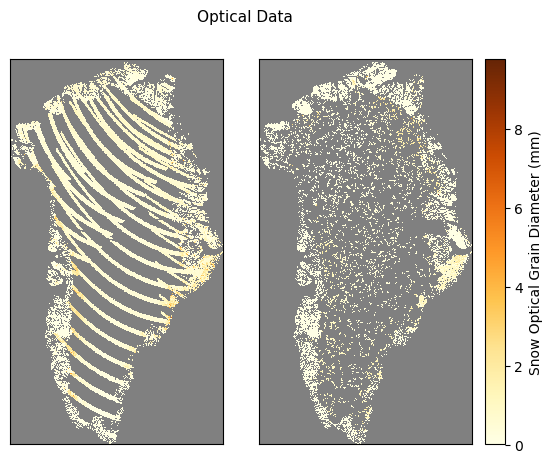

In [120]:
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,  figsize=(7,5))



dotted_im = dotted_data.plot(ax=axs[0], cmap=cmap, add_colorbar=False)
axs[0].set_title('')


# Plot the continuous data
striped_im = striped_data.plot(ax=axs[1], cmap=cmap, cbar_kwargs=cbar_kwargs, add_colorbar=True)
axs[1].set_title('')

# Adjust the aspect ratio of both subplots to be equal
axs[0].set_aspect('equal')
axs[1].set_aspect('equal')

# Hide the x-axis and y-axis labels for both subplots
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

for idx, ax in enumerate(axs):
    ax.set_aspect("equal")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)


fig.suptitle('Optical Data', fontsize=11)
plt.subplots_adjust(wspace=0.03)
# reduce the space between plots and title without changing the figure size and vertical space
plt.show()

## RESULTS

In [3]:
date = "2019-08-14"
path = r"../Data/combined/dataframe_extended/"
data = f.import_data(date_from=date, date_to=date, df_path=path, predict_only=False)
data = f.data_normalization(data)
data.head()

100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

Not applicable for feature'mw_value'.
Not applicable for feature'col'.
Not applicable for feature'row'.
Not applicable for feature'mw_value_yesterday'.


,x,y,mw_value,opt_value,col,row,mean_3,mean_9,sum_5,mw_value_yesterday,mw_value_7_day_average,hours_of_daylight,elevation_data,slope_data,aspect_data,distance_to_margin
7,0.566051,0.993989,0.0,0.006382,827,16,0.0,0.0,0.0,0.0,0.0,1.0,0.074174,0.129044,0.841809,0.044088
68,0.534565,0.972201,0.0,0.000203,781,74,0.0,0.0,0.0,0.0,0.0,1.0,0.088251,0.013730,0.847711,0.116960
69,0.535250,0.972201,0.0,0.000318,782,74,0.0,0.0,0.0,0.0,0.0,1.0,0.080671,0.032565,0.924820,0.118053
70,0.538672,0.972201,0.0,0.000719,787,74,0.0,0.0,0.0,0.0,0.0,1.0,0.087439,0.085883,0.991787,0.123850
71,0.539357,0.972201,0.0,0.000908,788,74,0.0,0.0,0.0,0.0,0.0,1.0,0.077964,0.065382,0.965729,0.125073



### MEAN PRED, STD, ERROR GRID

**ONLY RUN THIS CELL IF YOU WANT TO SAVE ALL PREDICTIONS FOR NEW DATE**

In [4]:
# ONLY RUN IF YOU WANT TO SAVE ALL PREDICTIONS FOR NEW DATE

#for idx1, model_name in enumerate(["LinearRegression", "LassoRegression", "RidgeRegression", "ElasticNetRegression", "RandomForest", "XGBoost"]):
for idx1, model_name in enumerate(["LassoRegression"]):
    model = f.load_object(model_name)
    data_predicted = f.mean_predict(model, data)

    for metric in ["mean", "std", "error"]:
        print(model_name, metric)
        f.save_prediction_tif(data_predicted, metric, f"../Data/results/{model_name}_2019-08-14_{metric}.tif")
    print()

LassoRegression mean


100%|██████████| 871181/871181 [00:57<00:00, 15276.07it/s]


LassoRegression std


100%|██████████| 871181/871181 [00:48<00:00, 18093.95it/s]


LassoRegression error


100%|██████████| 871181/871181 [00:49<00:00, 17667.50it/s]

C:\Users\ninaz\AppData\Local\Temp\ipykernel_19584\2802478361.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


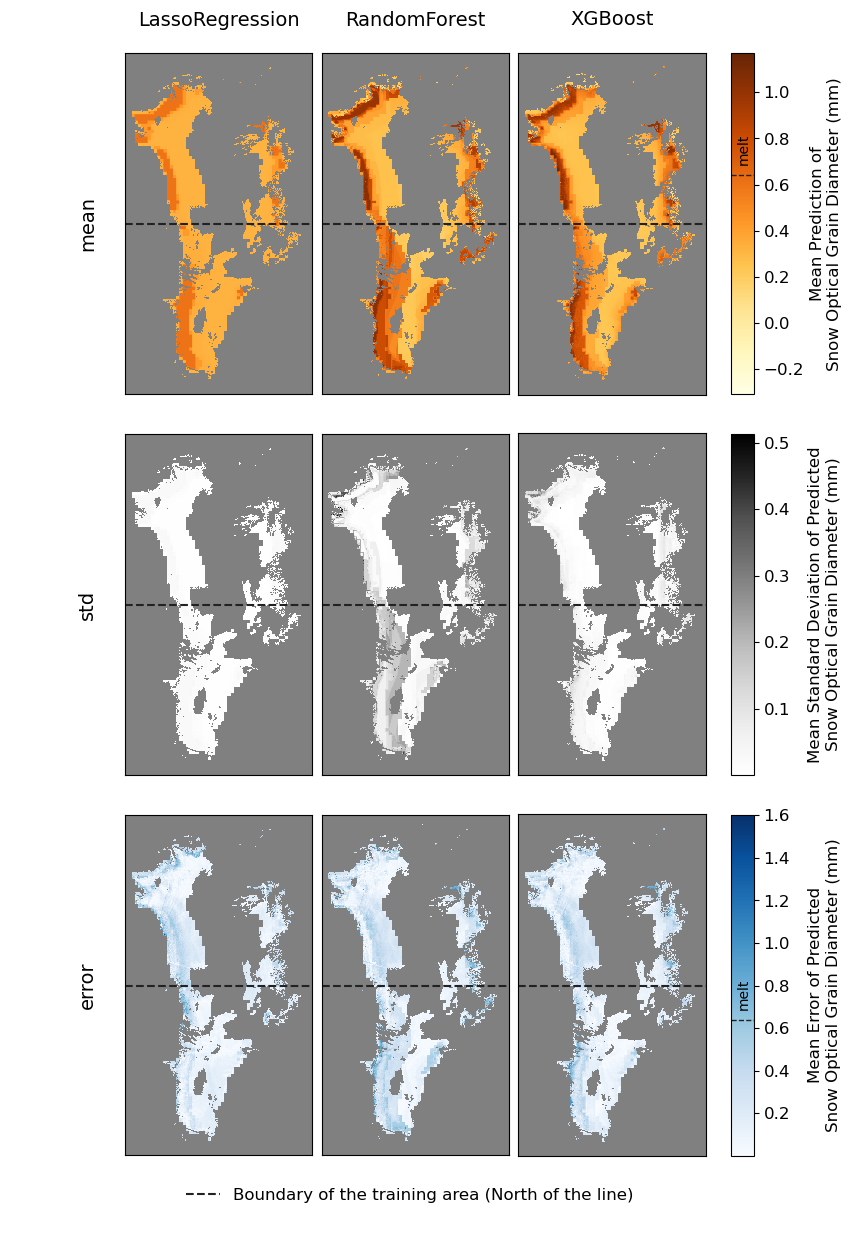

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(8, 12), gridspec_kw={'width_ratios': [1, 1, 1.34]})

# Titles for each column
cols = ["LassoRegression", "RandomForest", "XGBoost"]
rows = ["mean", "std", "error"]
cbar_labels = ["Mean Prediction of\nSnow Optical Grain Diameter (mm)", "Mean Standard Deviation of Predicted\nSnow Optical Grain Diameter (mm)", "Mean Error of Predicted\nSnow Optical Grain Diameter (mm)"]



# add subplot to each axis
for idx1, model_name in enumerate(cols):
    for idx2, metric in enumerate(rows):

        data_tif = xr.open_dataarray(f"../Data/results/{model_name}_2019-08-14_{metric}.tif")

        if metric == "mean":
            cmap = YlOrBr
            cmap.set_bad('gray', 1.)
            vmin, vmax = -0.30933694, 1.1704209
        elif metric == "std":
            cmap = Greys
            cmap.set_bad('gray', 1.)
            vmin, vmax = 0.00053095, 0.5135851
        else:
            cmap = Blues
            cmap.set_bad('gray', 1.)
            vmin, vmax = 0.0000000022, 1.6034958

        ax = axs[idx2, idx1]
        im = data_tif.plot(cmap=cmap, ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False)
        ax.set_aspect("equal")
        ax.axes.get_xaxis().set_visible(False)
        ax.set_yticks([])
        ax.set_ylabel("")
        ax.set_title("")
        ax.axhline(y=-2000000.0, color='#222222', linestyle='--')

         # Create a color bar for the rightmost plot of each row
        if idx1 == len(cols) - 1:
            cbar = plt.colorbar(im, ax=axs[idx2, idx1], location='right', pad=0.1, shrink=0.933, aspect=15)
            cbar.set_label(cbar_labels[idx2])
            # increase size of cbar labels
            cbar.ax.tick_params(labelsize=12)
            # increase size of cbar lable
            cbar.ax.yaxis.label.set_size(12)
            cbar.ax.axhline(y=0.64, c='#222222', linestyle='--', linewidth=1)
            cbar.ax.annotate('melt', (0.23,0.7), rotation=90, fontsize=10)
            if idx2 != 0:
                # set spacing between cbar and cbar label
                cbar.ax.yaxis.labelpad = 13


for ax, col in zip(axs[0], cols):
    ax.set_title(col, fontsize=14, pad=20)

for ax, row in zip(axs[:,0], rows):
    #ax.text(0.5, 1, row, fontsize=14, ha='center', va='center', rotation=90)
    ax.set_ylabel(row, fontsize=14, rotation=90, labelpad=20)

# Add legend handle at the bottom
legend_elements = [Line2D([0], [0], color='#222222', linestyle='--', label='Boundary of the training area (North of the line)')]
legend_ax = fig.add_axes([-0.07, -0.05, 1, 0.08])
legend_ax.set_axis_off()
legend_ax.legend(handles=legend_elements, loc='center', ncol=1, frameon=False, fontsize=12) 

plt.subplots_adjust(hspace=0.1)
plt.tight_layout()
plt.show()

### FILL PREDICTION PLOT

In [ ]:
# RUN ONLY INITIALLY OR IF MODEL CHANGES

date = "2019-08-14"
path = r"../Data/combined/dataframe_extended/"
data = f.import_data(date_from=date, date_to=date, df_path=path, predict_only=True)
data = f.data_normalization(data)
data.head()

model = f.load_object("LassoRegression")
data_predicted = f.mean_predict(model, data)
f.save_prediction_tif(data_predicted, "mean", f"../Data/results/LassoRegression_2019-08-14_meanPredOnly.tif")

In [44]:
path_opt = r"../Data/optical-rs/2019-08-14_grain_diameter.tif"
path_lasso = r"../Data/results/LassoRegression_2019-08-14_meanPredOnly.tif"

data_opt = xr.open_dataarray(path_opt)
data_lasso = xr.open_dataarray(path_lasso)

data_opt = data_opt.sel(y=data_lasso.y, x=data_lasso.x)

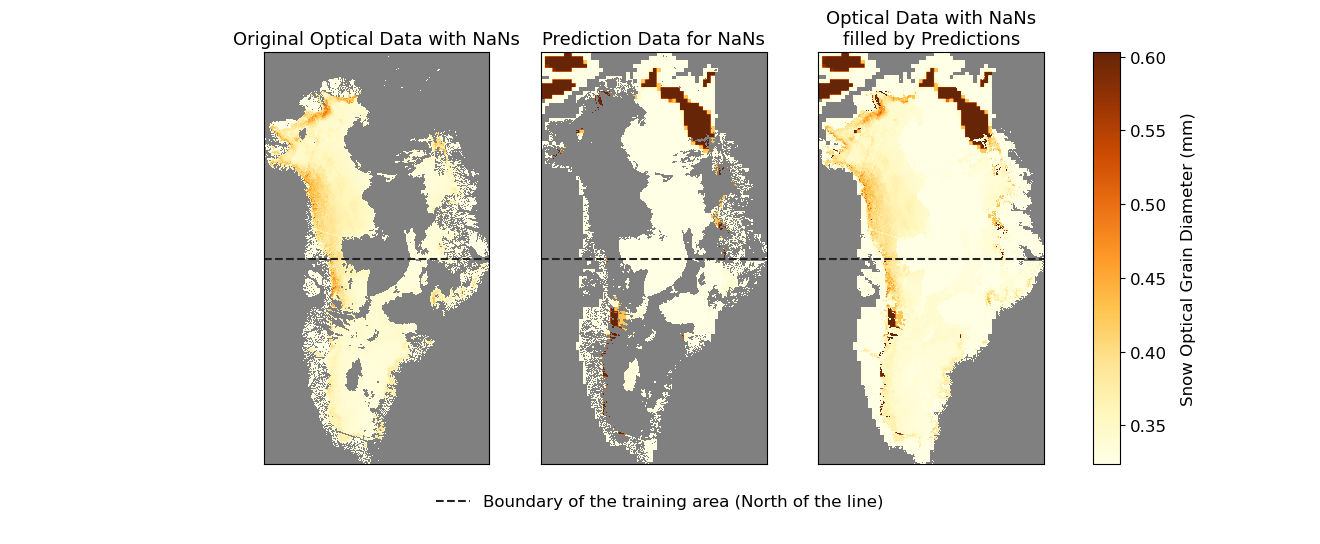

In [65]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(13, 8), gridspec_kw={'width_ratios': [1, 1, 1.43]})
cmap = YlOrBr
cmap.set_bad('gray',1.)
cbar_kwargs={'label': "Snow Optical Grain Diameter (mm)"}
cbar_kwargs2={'label': "", "pad":0.2}

# Optical Data for 15.07.2019
p_opt = data_opt.plot(cmap=cmap, ax=axs[0], add_colorbar=False)   # set max of colorbar = 3 to make melting more clear as most values are below 3 
axs[0].axhline(y=-2000000.0, color='#222222', linestyle='--')

# Decision Tree Classifier where Pred is NaN for 15.07.2019
cmap2 = YlOrBr
cmap2.set_bad('gray',1.)
p_dtr = data_lasso.where(np.isnan(data_opt), drop=True).plot(cmap=cmap2, ax=axs[1], add_colorbar=False)   # set max of colorbar = 3 to make melting more clear as most values are below 3 
axs[1].axhline(y=-2000000.0, color='#222222', linestyle='--')


p_opt2 = data_opt.plot(cmap=cmap, ax=axs[2], add_colorbar=False)

p_full = data_lasso.where(np.isnan(data_opt), drop=True).plot(cmap="YlOrBr",ax=axs[2], add_colorbar=False)
axs[2].axhline(y=-2000000.0, color='#222222', linestyle='--')


plots = [p_opt, p_dtr, p_full]
titles = ["Original Optical Data with NaNs", "Prediction Data for NaNs", "Optical Data with NaNs\nfilled by Predictions"]
for idx, plot in enumerate(plots):
    plot.axes.title.set_size(13)
    plot.axes.title.set_text(titles[idx])


for idx, ax in enumerate(axs):
    ax.set_aspect("equal")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

fig.subplots_adjust(right=0.8)


cbar = plt.colorbar(p_full, location='right', pad=0.15, shrink=0.67, aspect=15)
cbar.set_label("Snow Optical Grain Diameter (mm)")
# increase size of cbar labels
cbar.ax.tick_params(labelsize=12)
# increase size of cbar lable
cbar.ax.yaxis.label.set_size(12)
cbar.ax.yaxis.labelpad = 10
cbar.ax.axhline(y=0.64, c='#222222', linestyle='--', linewidth=1)
cbar.ax.annotate('melt', (0.23,0.7), rotation=90, fontsize=10)


# Add legend handle at the bottom
legend_elements = [Line2D([0], [0], color='#222222', linestyle='--', label='Boundary of the training area (North of the line)')]
legend_ax = fig.add_axes([-0.07, 0.15, 1, 0.08])
legend_ax.set_axis_off()
legend_ax.legend(handles=legend_elements, loc='center', ncol=1, frameon=False, fontsize=12) 


plt.show()